# Chapter 6 - Plotting with Seaborn and Customization

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, EngFormatter, MultipleLocator
from matplotlib import cm
import numpy as np
import pandas as pd
import calendar

In [2]:
fb = pd.read_csv(
    '../data/fb_stock_prices_2018.csv',
    index_col='date',
    parse_dates=True
)
quakes = pd.read_csv('../data/earthquakes.csv')

## Categorical data

<AxesSubplot: xlabel='magType', ylabel='mag'>

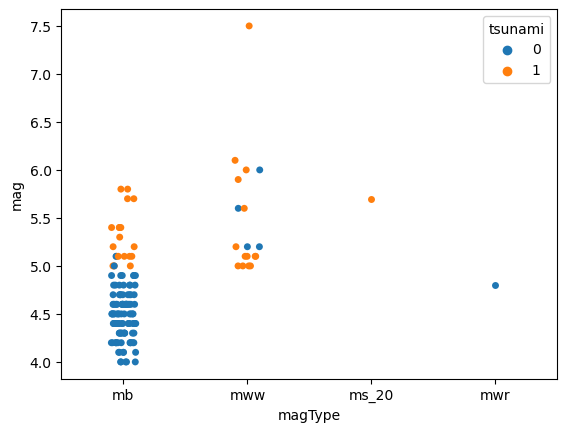

In [3]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

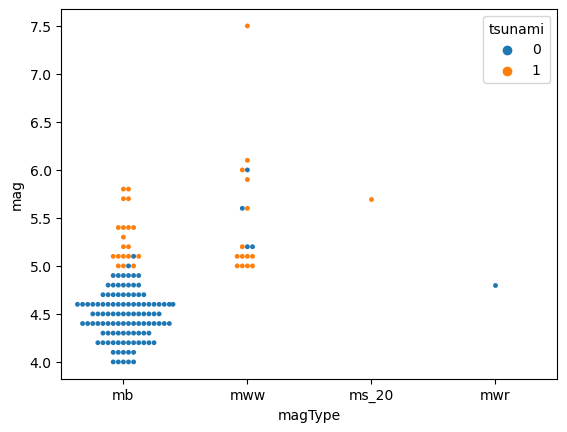

In [4]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"'),
    size=3.5
);

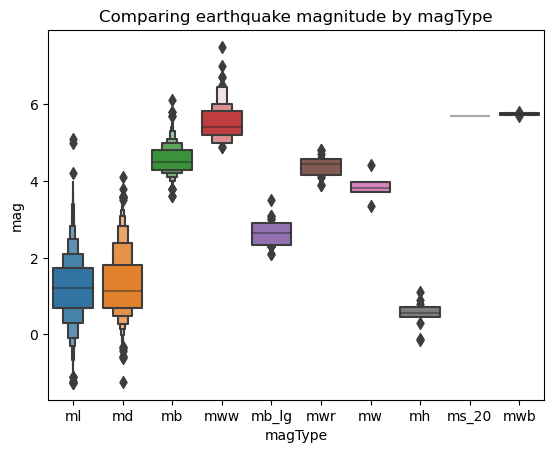

In [5]:
sns.boxenplot(
    x='magType',
    y='mag',
    data=quakes[['magType', 'mag']]
)
plt.title('Comparing earthquake magnitude by magType');

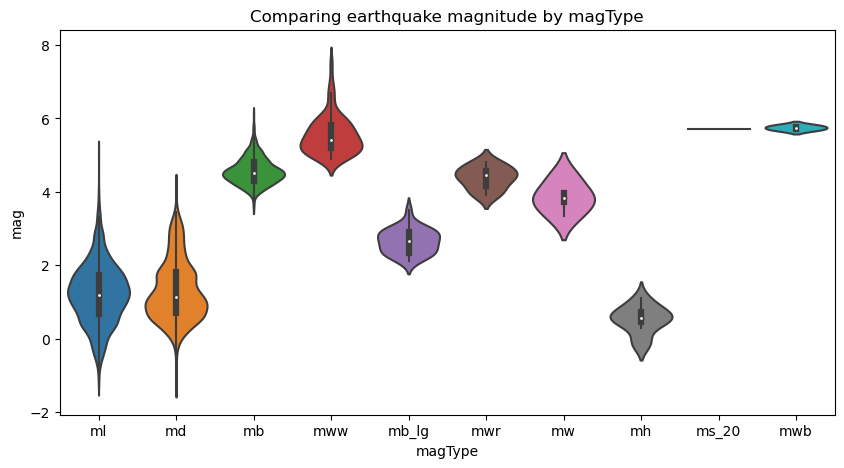

In [6]:
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, scale='width'
)
plt.title('Comparing earthquake magnitude by magType');

### Correlations and heatmaps

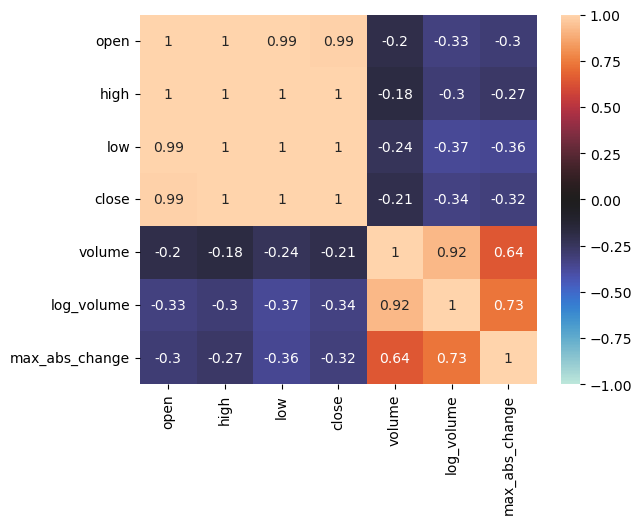

In [7]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True,
    center=0,
    vmin=-1,
    vmax=1
);

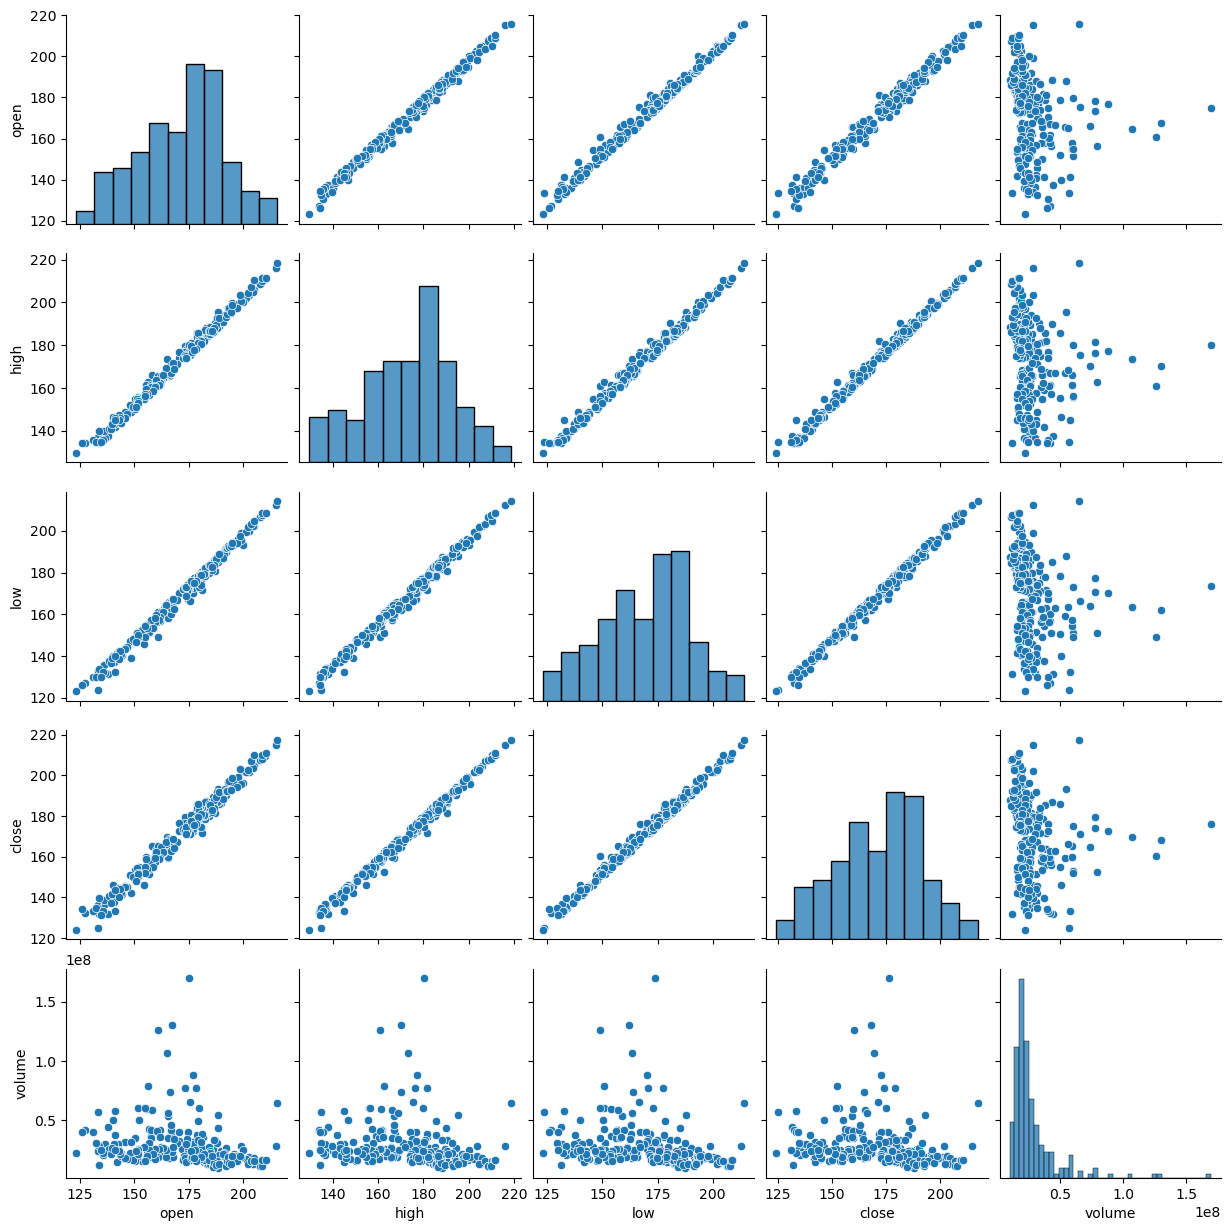

In [8]:
sns.pairplot(fb);

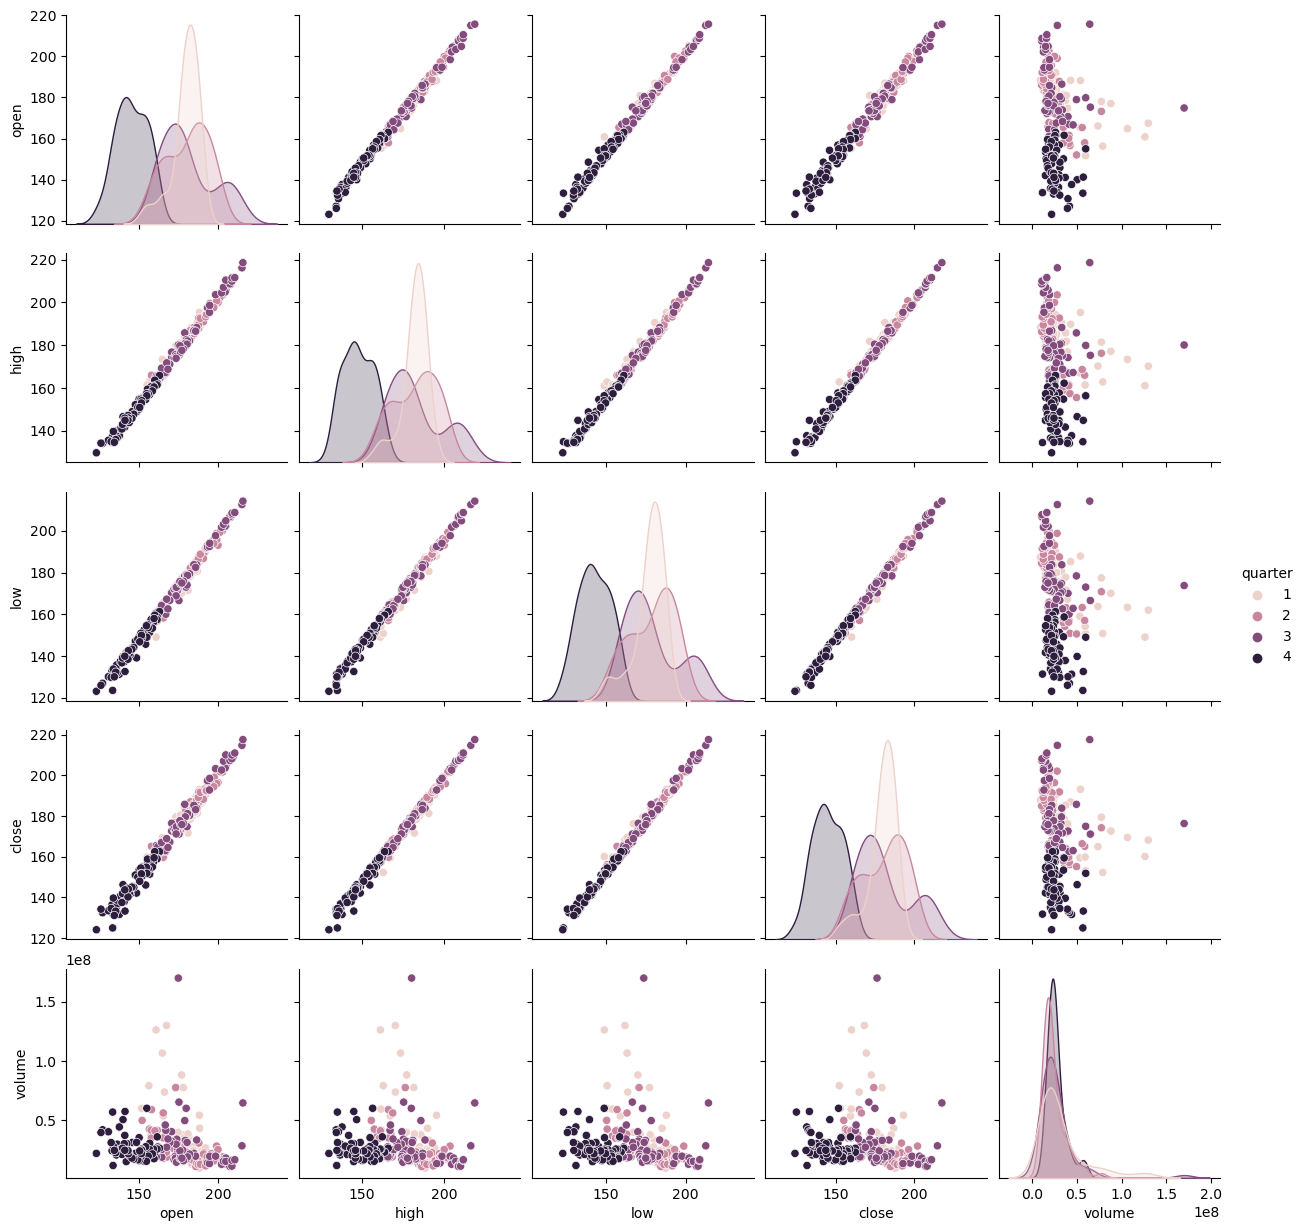

In [9]:
sns.pairplot(
    fb.assign(quarter=lambda df_: df_.index.quarter),
    diag_kind='kde', hue='quarter'
);

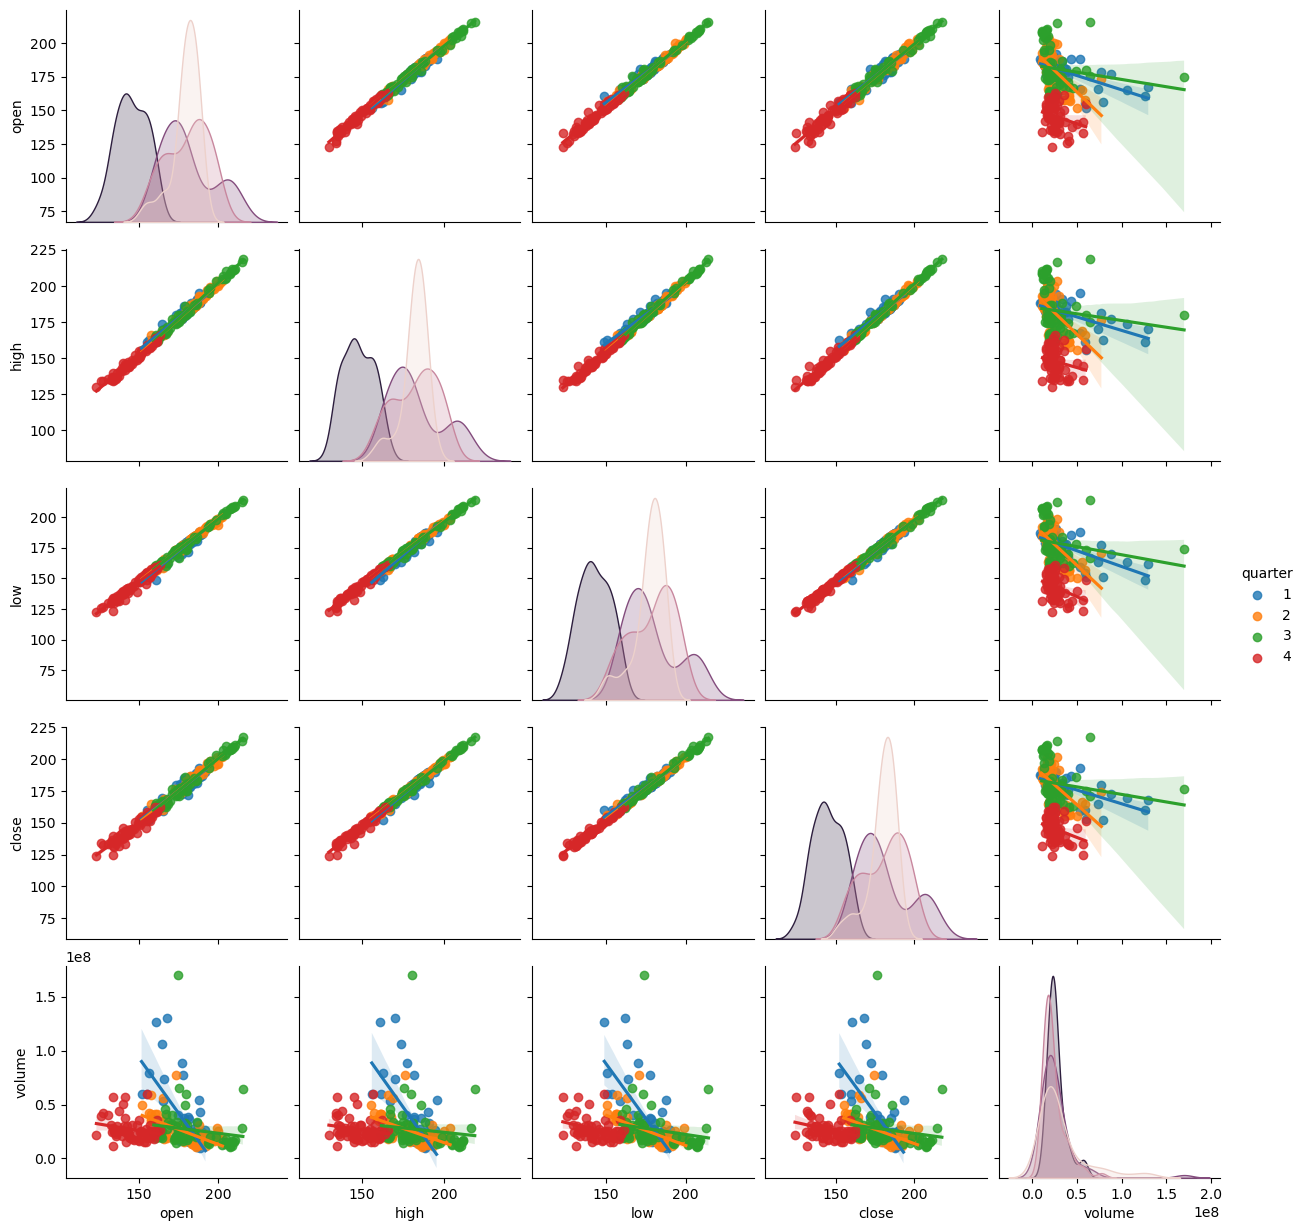

In [10]:
sns.pairplot(
    fb.assign(quarter=lambda df_: df_.index.quarter),
    kind='reg', hue='quarter'
);

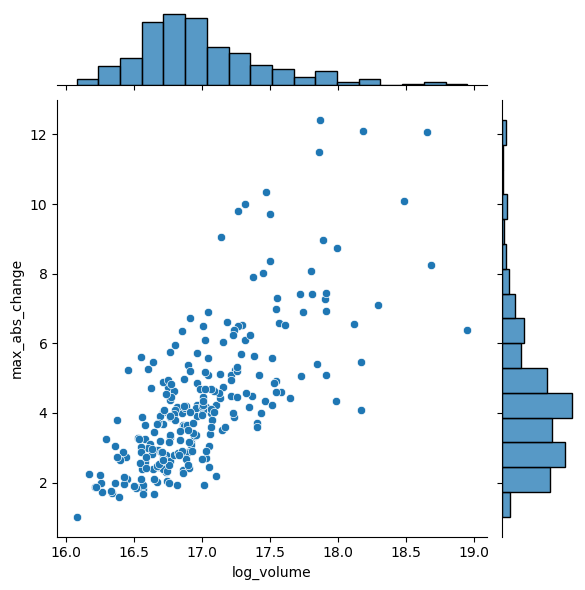

In [11]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
);

/opt/homebrew/Caskroom/miniforge/base/envs/eda/lib/python3.11/site-packages/seaborn/axisgrid.py:2214: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


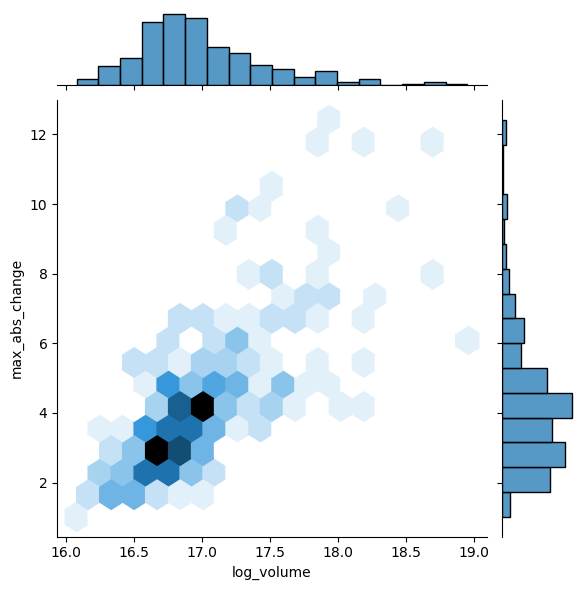

In [12]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ),
    marginal_kws={'hist_kws':{'ec':'k'}}
);

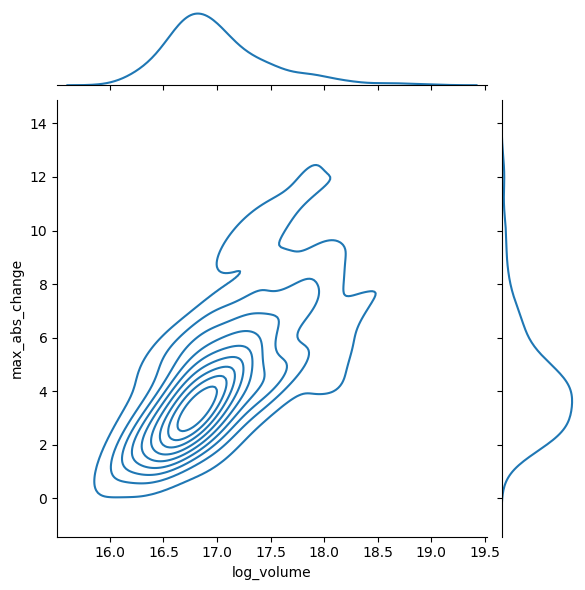

In [13]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    # joint_kws={'kde_kws':{'fill':None}},
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
);

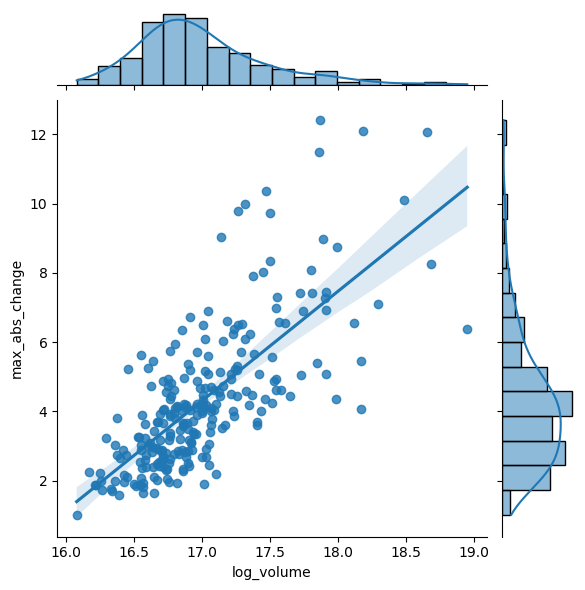

In [14]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
);

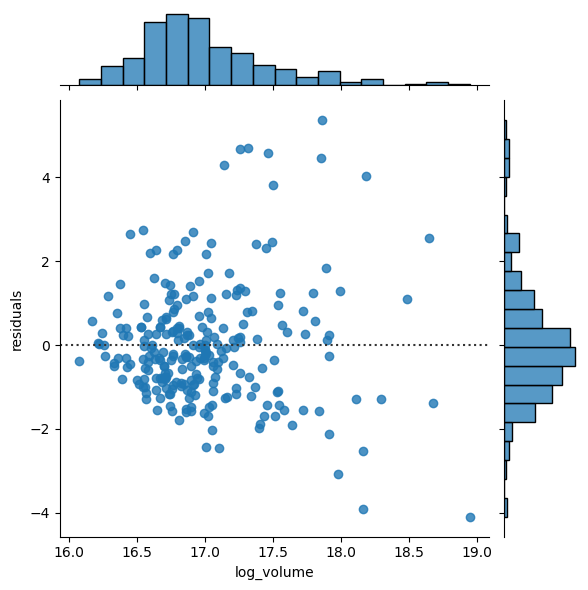

In [15]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)
plt.ylabel('residuals');

### Regression plots

In [16]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:, -2:]

In [17]:
import itertools

In [18]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator


In [19]:
def reg_resid_plots(data):
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15,8))
    
    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(
            axes, (sns.regplot, sns.residplot)
        ):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            if func == sns.residplot:
                subplot.set_ylabel('residuals')
    return fig.axes

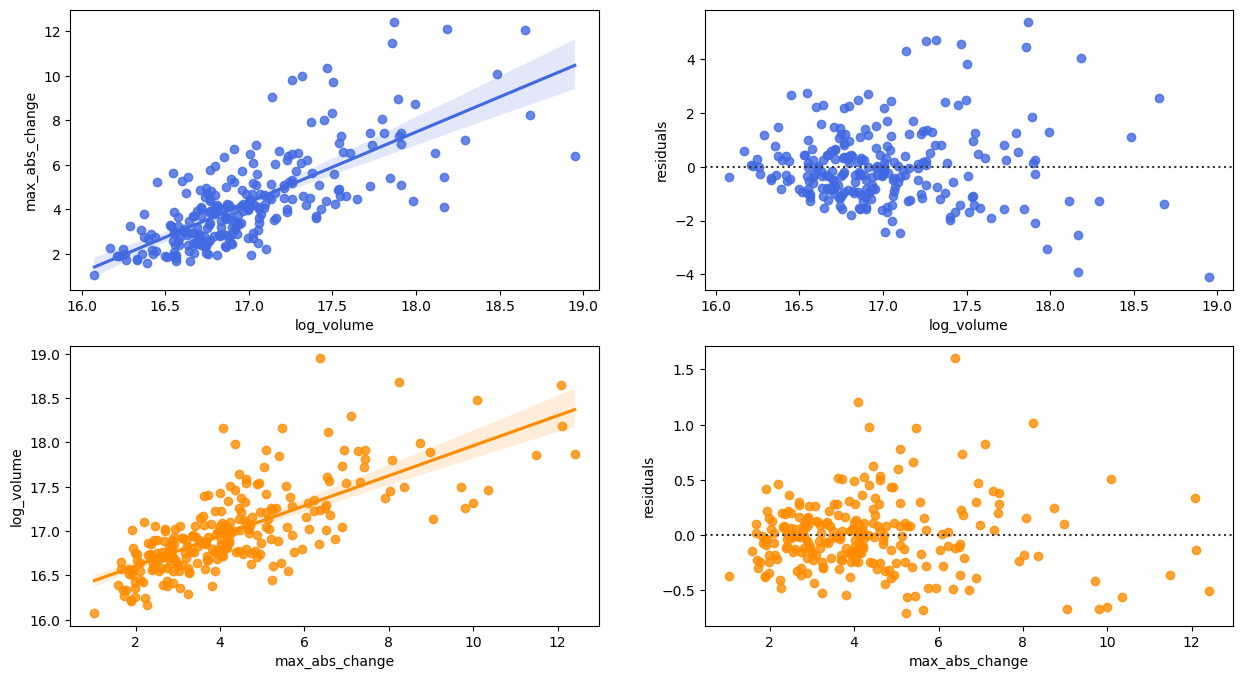

In [20]:
reg_resid_plots(fb_reg_data);

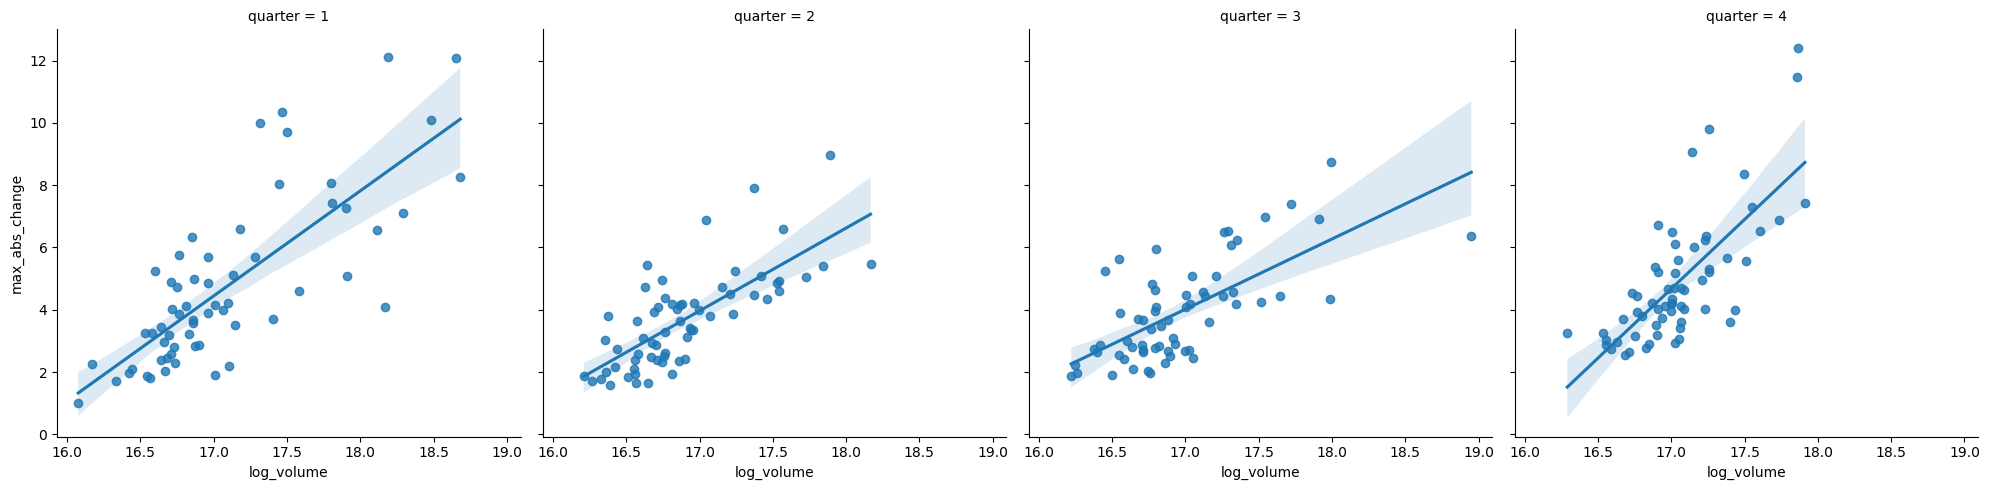

In [21]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    col='quarter',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda df_: df_.index.quarter
    )
);

### Faceting

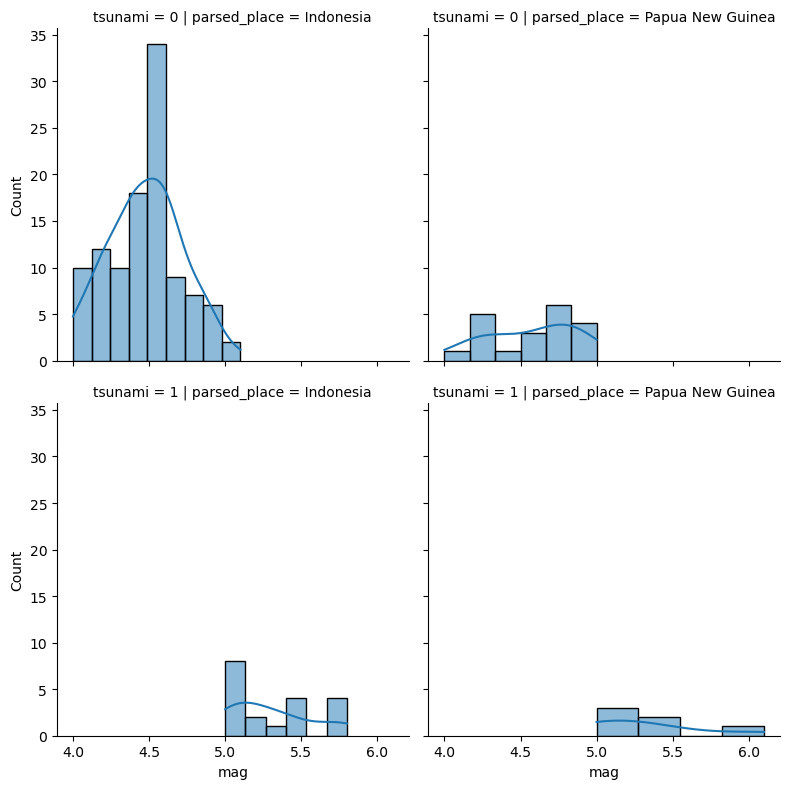

In [22]:
g = sns.FacetGrid(
    quakes.query(
        'parsed_place.isin('
        '["Indonesia", "Papua New Guinea"]) '
        'and magType == "mb"'
    ),
    row = 'tsunami',
    col = 'parsed_place',
    height = 4
)

g = g.map(sns.histplot, 'mag', kde=True)

## Formatting plots with matplotlib

In [23]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [24]:
covid = (pd.read_csv('../data/covid19_cases.csv')
         .assign(date=lambda df_: pd.to_datetime(df_.dateRep, format='%d/%m/%Y'))
         .set_index('date')
         .replace('United_States_of_America', 'USA')
         .sort_index()['2020-01-18':'2020-09-18']
        )

### Titles and labels

Text(0, 0.5, 'price ($)')

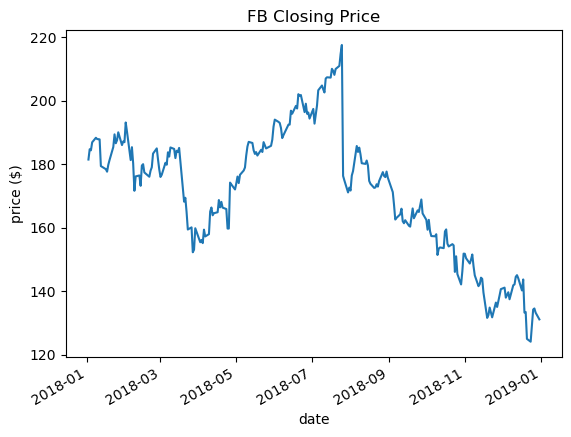

In [25]:
fb.close.plot()
plt.title('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

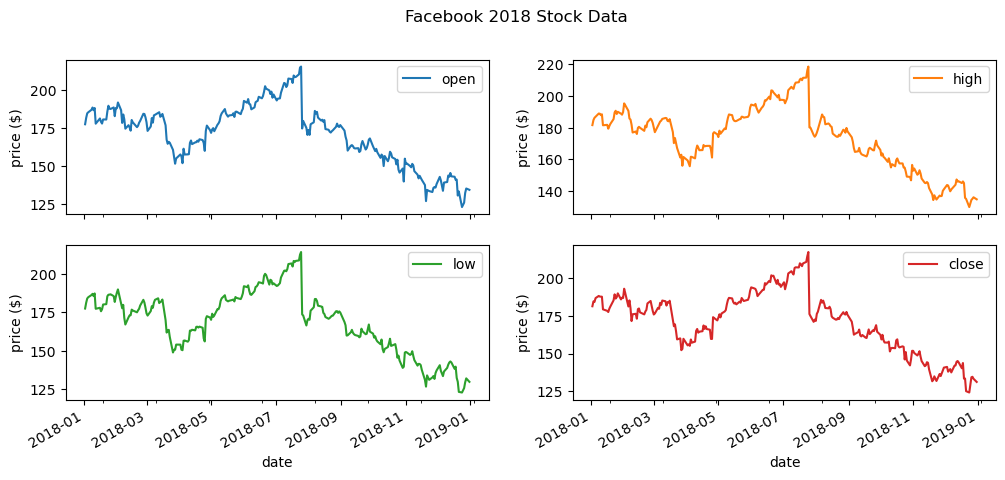

In [26]:
axes = (fb
 .iloc[:,:4]
 .plot(subplots=True, layout=(2,2), figsize=(12,5))
)
plt.suptitle('Facebook 2018 Stock Data')
for ax in axes.flatten():
    ax.set_ylabel('price ($)')

### Legends

Text(0, 0.5, 'price ($)')

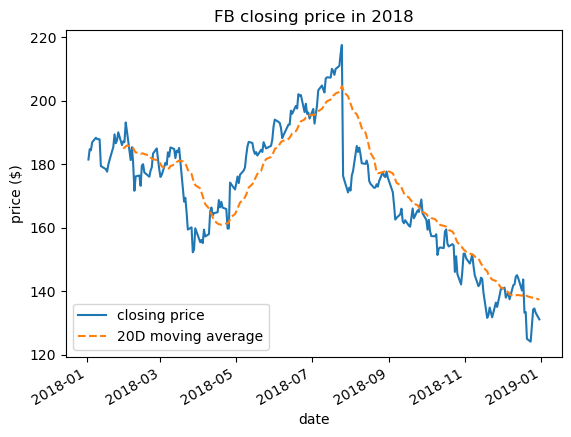

In [27]:
(fb
 .assign(ma=lambda df_: df_.close.rolling(20).mean())
 .plot(
     y=['close','ma'],
     title='FB closing price in 2018',
     label=['closing price', '20D moving average'],
     style=['-','--']
 )
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

In [28]:
new_cases = (covid
             .reset_index()
             .pivot(index='date',
                   columns='countriesAndTerritories',
                   values='cases'
                   )
             .fillna(0)
            )
new_cases.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United_Republic_of_Tanzania', 'United_States_Virgin_Islands',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Western_Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='countriesAndTerritories', length=210)

In [29]:
pct_new_cases = (new_cases
                 .apply(lambda df_: df_ / new_cases.apply('sum', axis=1), axis=0)
                 [['Italy','China','Spain','USA','India','Brazil']]
                 .sort_index(axis=1)
                 .fillna(0)
                )
pct_new_cases.head()

countriesAndTerritories,Brazil,China,India,Italy,Spain,USA
date,,,,,,
2020-01-18,0.0,1.000000,0.0,0.0,0.0,0.000000
2020-01-19,0.0,1.000000,0.0,0.0,0.0,0.000000
2020-01-20,0.0,0.950000,0.0,0.0,0.0,0.000000
2020-01-21,0.0,0.986928,0.0,0.0,0.0,0.006536
2020-01-22,0.0,0.985915,0.0,0.0,0.0,0.000000


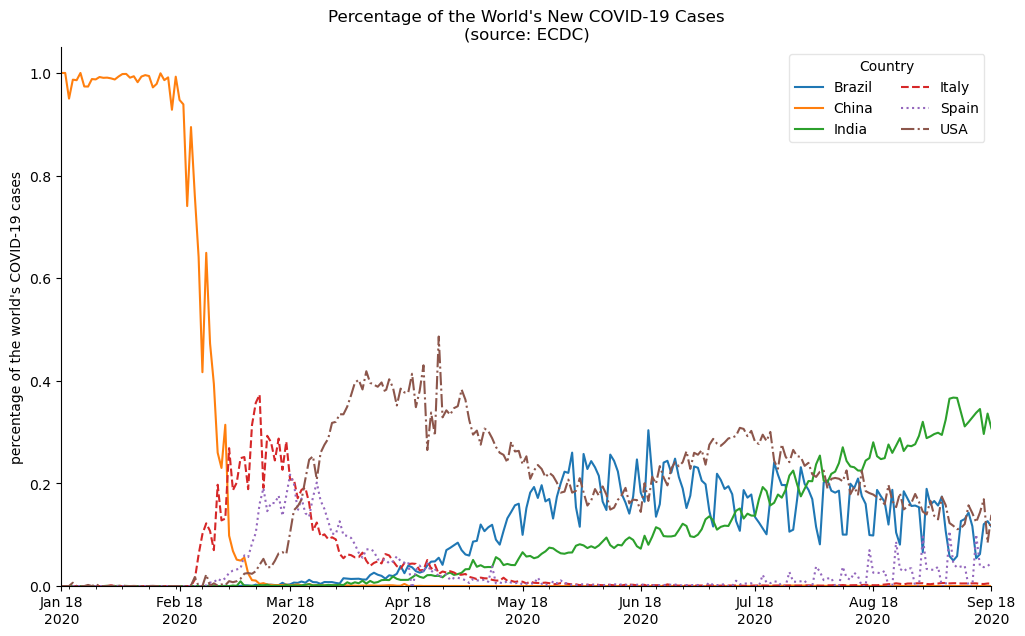

In [30]:
ax = pct_new_cases.plot(
    figsize=(12,7),
    style=['-'] * 3 + ['--',':','-.'],
    title='Percentage of the World\'s New COVID-19 Cases'
          '\n(source: ECDC)'
)
tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

## Formatting axes

In [31]:
covid.index[covid.index.day == 18].unique()

DatetimeIndex(['2020-01-18', '2020-02-18', '2020-03-18', '2020-04-18',
               '2020-05-18', '2020-06-18', '2020-07-18', '2020-08-18',
               '2020-09-18'],
              dtype='datetime64[ns]', name='date', freq=None)

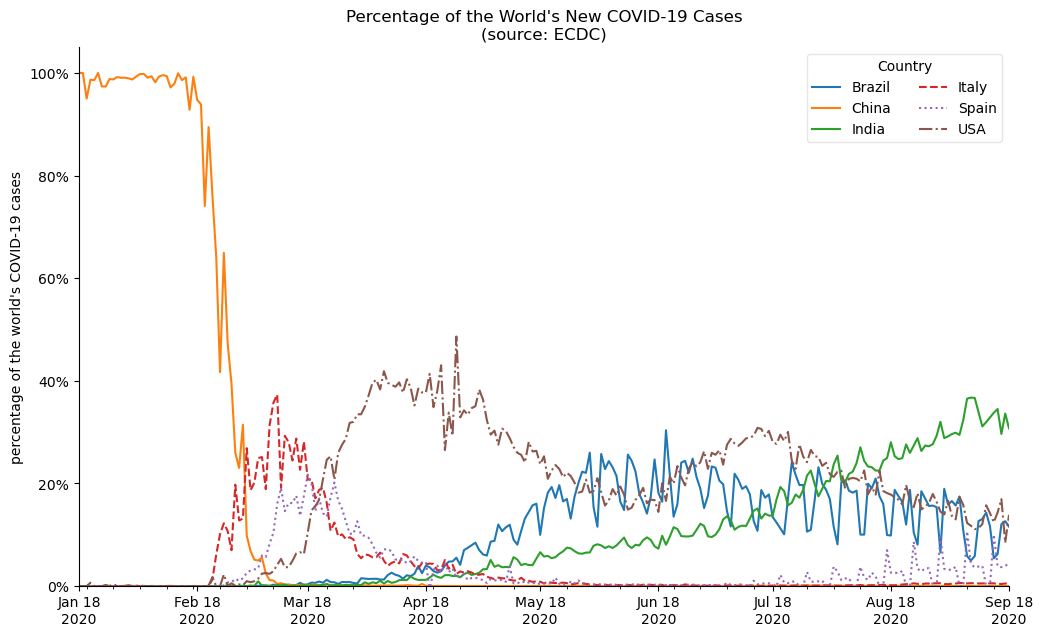

In [32]:
ax = pct_new_cases.plot(
    figsize=(12,7),
    style=['-'] * 3 + ['--',':','-.'],
    title='Percentage of the World\'s New COVID-19 Cases'
          '\n(source: ECDC)'
)
tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

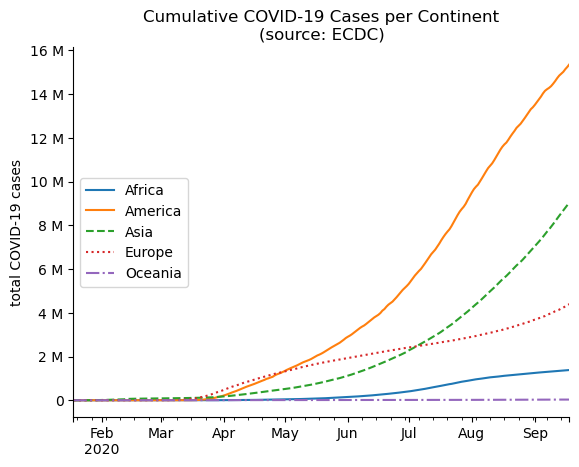

In [33]:
ax = (covid
      .query('continentExp != "Other"')
      .groupby(['continentExp', pd.Grouper(freq='1D')])
      .cases
      .sum()
      .unstack(0)
      .apply('cumsum')
      .plot(
          style=['-','-','--',':','-.'],
          title='Cumulative COVID-19 Cases per Continent'
                '\n(source: ECDC)'
      )
     )

ax.legend(title='', loc='center left')
ax.set(xlabel='', ylabel='total COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

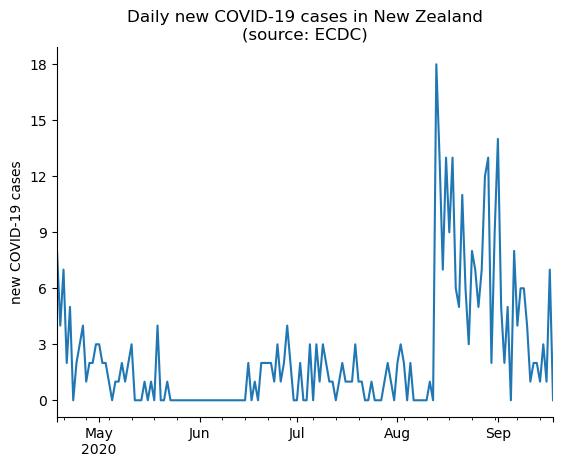

In [34]:
ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='Daily new COVID-19 cases in New Zealand'
          '\n(source: ECDC)'
)

ax.set(xlabel='', ylabel='new COVID-19 cases')
ax.yaxis.set_major_locator(MultipleLocator(base=3))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

## Customizing visualization

In [35]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [36]:
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


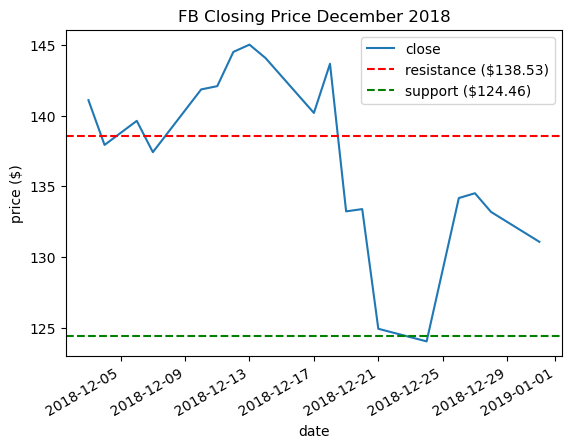

In [37]:
support = 124.457
resistance = 138.527

fb.close['2018-12'].plot(title='FB Closing Price December 2018')
plt.axhline(y=resistance, color='r', linestyle='--',
           label=f'resistance (${resistance:,.2f})')
plt.axhline(y=support, color='g', linestyle='--',
           label=f'support (${support:,.2f})')

plt.ylabel('price ($)')
plt.legend()

In [38]:
from viz import std_from_mean_kde

Text(0.5, 0, 'mb earthquake magnitude')

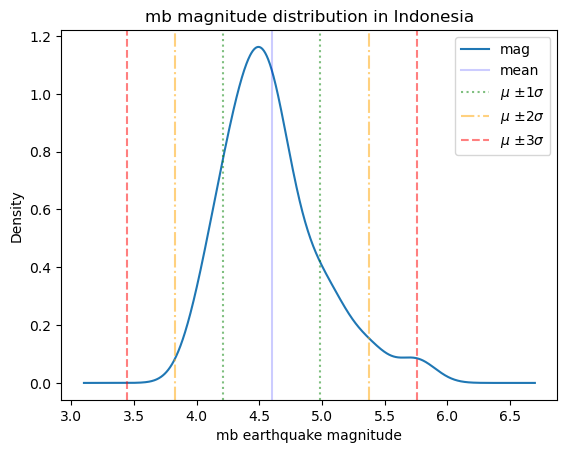

In [39]:
ax = std_from_mean_kde(
    quakes.query(
        'magType == "mb" and parsed_place == "Indonesia"'
    ).mag
)

ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

## Shading regions

Text(0, 0.5, 'Price ($)')

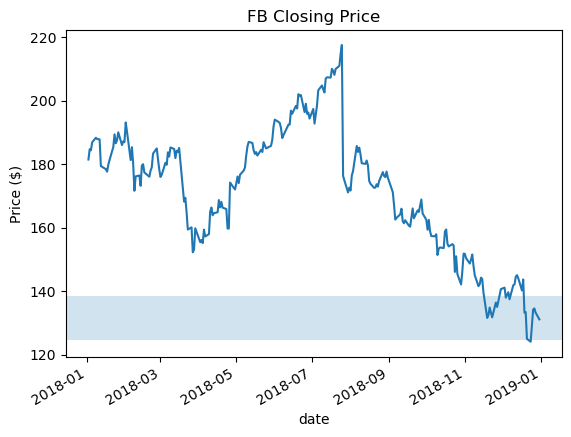

In [40]:
ax = fb.close.plot(title='FB Closing Price')
ax.axhspan(support, resistance, alpha=0.2)
plt.ylabel('Price ($)')

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

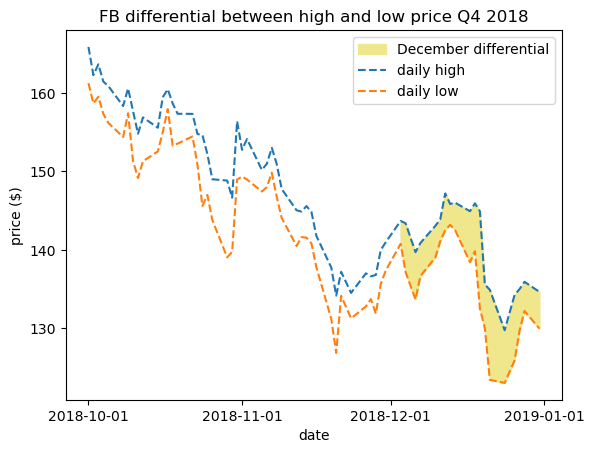

In [41]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low,
                where=fb_q4.index.month == 12,
                color='khaki', label='December differential'
                )
plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks([
    '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'
])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.legend()
plt.title(
    'FB differential between high and low price Q4 2018'
)

## Annotations

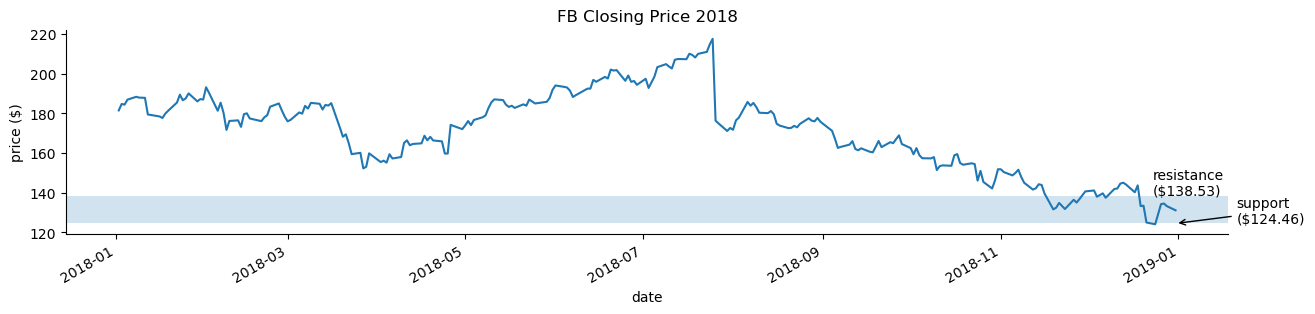

In [42]:
ax = fb.close.plot(title='FB Closing Price 2018',
                  figsize=(15,3))
ax.set_ylabel('price ($)')
ax.axhspan(support, resistance, alpha=0.2)
plt.annotate(
    f'support\n(${support:,.2f})',
    xy=('2018-12-31', support),
    xytext=('2019-01-21', support),
    arrowprops={'arrowstyle': '->'}
)
plt.annotate(
    f'resistance\n(${resistance:,.2f})',
    xy=('2018-12-23', resistance)
)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

Text(0, 0.5, 'price ($)')

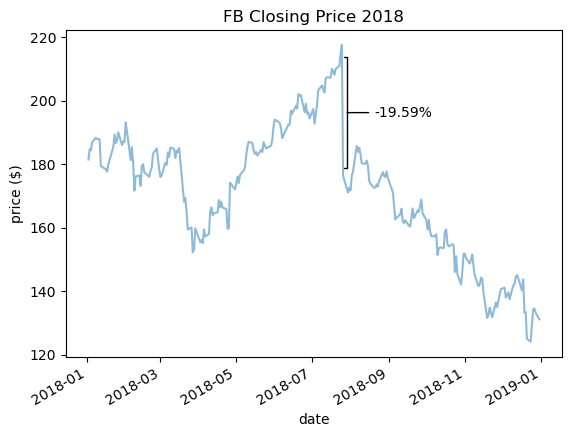

In [43]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop:,.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2')
)
plt.ylabel('price ($)')

## Colors

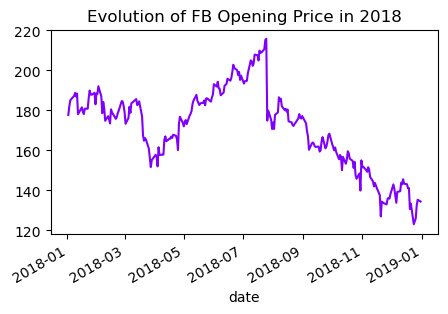

In [44]:
fb.plot(
    y='open',
    figsize=(5,3),
    color=(128 / 255, 0, 1),
    legend=False,
    title='Evolution of FB Opening Price in 2018'
)
plt.ylabel=('price ($)')

### Colormaps

In [45]:
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Text(0, 0.5, 'price ($)')

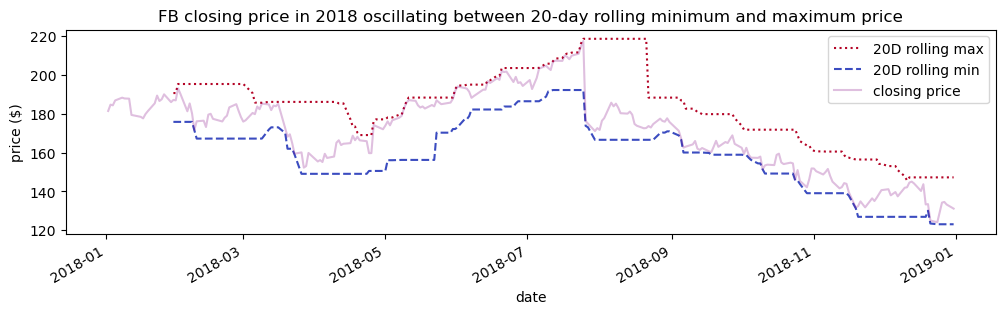

In [46]:
ax = fb.assign(
    rolling_min=lambda df_: df_.low.rolling(20).min(),
    rolling_max=lambda df_: df_.high.rolling(20).max()
).plot(
    y=['rolling_max', 'rolling_min'],
    colormap='coolwarm_r',
    label=['20D rolling max', '20D rolling min'],
    style=[':', '--'],
    figsize=(12,3),
    title='FB closing price in 2018 oscillating between '
          '20-day rolling minimum and maximum price'
)
ax.plot(
    fb.close, 'purple', alpha=0.25, label='closing price'
)
plt.legend()
ax.set_ylabel('price ($)')

## Textures

In [47]:
weekly_volume_traded = fb.loc['2018-Q4'].groupby(pd.Grouper(freq='W')).volume.sum()

In [48]:
weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')

[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

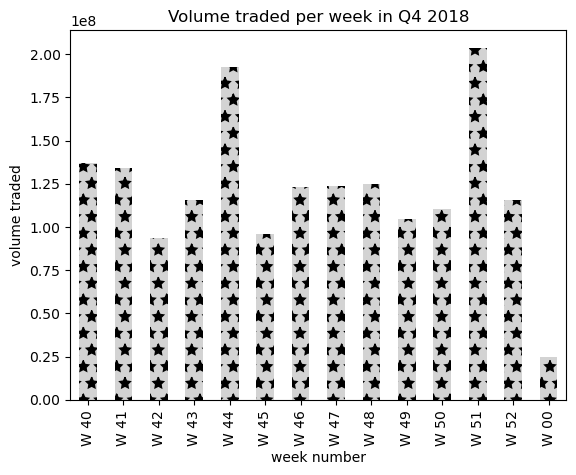

In [49]:
ax = weekly_volume_traded.plot(
    kind='bar',
    hatch='*',
    color='lightgray',
    title='Volume traded per week in Q4 2018'
)
ax.set(
    xlabel='week number',
    ylabel='volume traded'
)

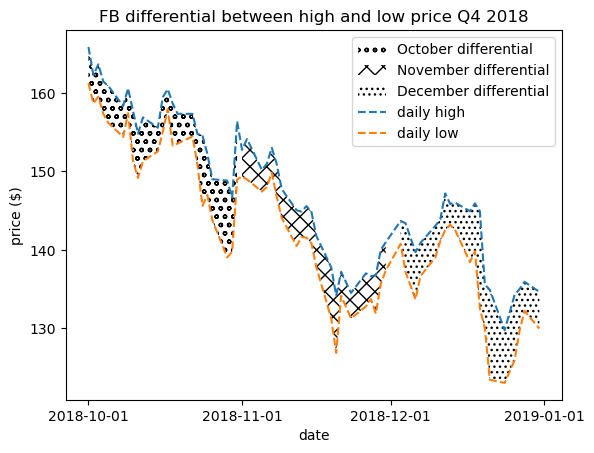

In [53]:
fb_q4 = fb.loc['2018-Q4']
for texture, month in zip(['oo','/\\/\\','...'], [10, 11, 12]):
    plt.fill_between(
        fb_q4.index, fb_q4.high, fb_q4.low,
        hatch=texture, facecolor='white',
        where=fb_q4.index.month == month,
        label=f'{calendar.month_name[month]} differential'
    )
plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks([
    '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'
])
plt.xlabel('date')
ax = plt.gca()
ax.set_ylabel('price ($)')
plt.title(
    'FB differential between high and low price Q4 2018'
)
plt.legend()